In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Load Data

In [69]:
data = pd.read_csv('data/london_merged.csv')
data.sample(10)


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
1126,2015-02-20 00:00:00,134,8.0,6.0,87.0,13.0,7.0,0.0,0.0,3.0
9796,2016-02-18 08:00:00,3380,4.0,1.0,87.0,14.0,3.0,0.0,0.0,3.0
13392,2016-07-18 12:00:00,1692,26.5,26.5,38.0,7.0,1.0,0.0,0.0,1.0
17197,2016-12-25 23:00:00,662,13.0,13.0,79.5,28.0,4.0,0.0,1.0,3.0
2242,2015-04-07 18:00:00,3633,17.0,17.0,50.5,9.0,2.0,0.0,0.0,0.0
2452,2015-04-16 12:00:00,1265,15.0,15.0,53.0,27.0,1.0,0.0,0.0,0.0
3229,2015-05-18 21:00:00,742,11.5,11.5,56.0,30.5,1.0,0.0,0.0,0.0
5030,2015-08-02 05:00:00,351,14.0,14.0,85.0,8.0,1.0,0.0,1.0,1.0
4431,2015-07-08 02:00:00,88,16.0,16.0,70.0,27.0,3.0,0.0,0.0,1.0
9193,2016-01-23 22:00:00,241,9.0,6.5,87.0,17.0,7.0,0.0,1.0,3.0


# Overview

In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [70]:
# Let's change timestamp to datetime object

data['timestamp'] = pd.to_datetime(data.timestamp)

In [351]:
data.describe(datetime_is_numeric=True)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,2016-01-03 22:31:00.571953664,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
min,2015-01-04 00:00:00,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2015-07-04 20:15:00,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,2016-01-03 15:30:00,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,2016-07-04 15:45:00,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,2017-01-03 23:00:00,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000
std,NaN,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911


In [352]:
# What's the record frequency of the data
data.timestamp.head(25)

# It looks like records are on an hourly basis

0    2015-01-04 00:00:00
1    2015-01-04 01:00:00
2    2015-01-04 02:00:00
3    2015-01-04 03:00:00
4    2015-01-04 04:00:00
5    2015-01-04 05:00:00
6    2015-01-04 06:00:00
7    2015-01-04 07:00:00
8    2015-01-04 08:00:00
9    2015-01-04 09:00:00
10   2015-01-04 10:00:00
11   2015-01-04 11:00:00
12   2015-01-04 12:00:00
13   2015-01-04 13:00:00
14   2015-01-04 14:00:00
15   2015-01-04 15:00:00
16   2015-01-04 16:00:00
17   2015-01-04 17:00:00
18   2015-01-04 18:00:00
19   2015-01-04 19:00:00
20   2015-01-04 20:00:00
21   2015-01-04 21:00:00
22   2015-01-04 22:00:00
23   2015-01-04 23:00:00
24   2015-01-05 00:00:00
Name: timestamp, dtype: datetime64[ns]

In [353]:
data.timestamp.dt.hour.value_counts().sort_index()

0     724
1     724
2     721
3     721
4     721
5     721
6     726
7     726
8     724
9     727
10    725
11    727
12    729
13    728
14    728
15    729
16    730
17    728
18    728
19    727
20    727
21    726
22    725
23    722
Name: timestamp, dtype: int64

The time resolution might be too high (variance due to hourly measurements might be considerably high, which might make it difficult for the algorithm find the underlying trend in the data). We could try with daily averages and see if we have an improvement in terms of model performance.

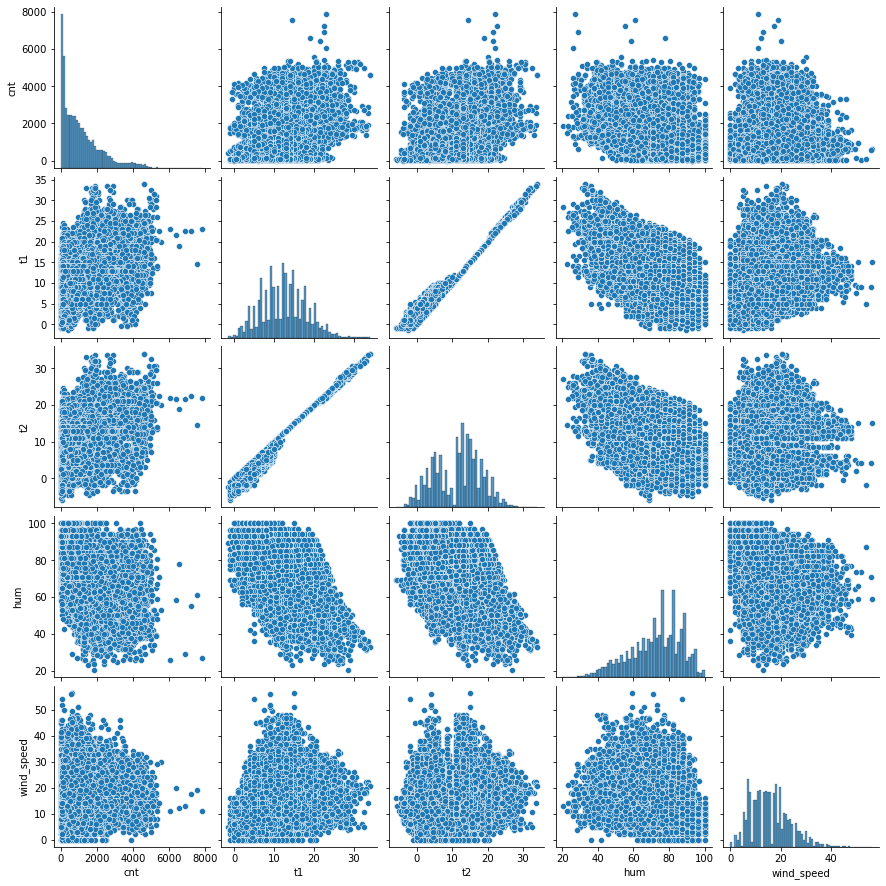

In [354]:
sns.pairplot(data.loc[:, 'cnt':'wind_speed'])
# t1 and t2 seems to be highly correlated...one of them must be dropped!

<AxesSubplot:>

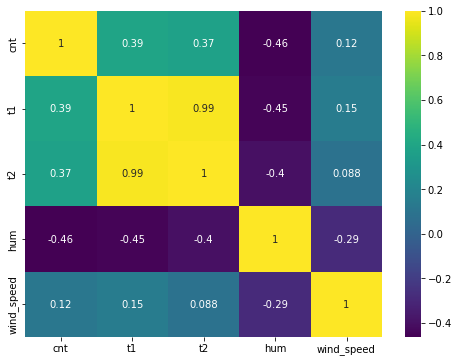

In [355]:
# confirmation correlation from graph
plt.figure(figsize = (8, 6))

sns.heatmap(data.loc[:, 'cnt':'wind_speed'].corr(), annot=True, cmap='viridis')

Correlation between `t1` and `t2` is 0.99. We'll keep `t1` since it seems to have a slightly better correlation to `cnt`.

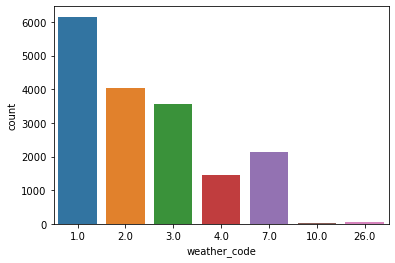

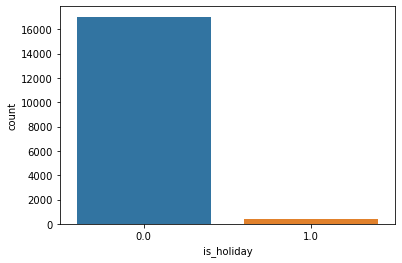

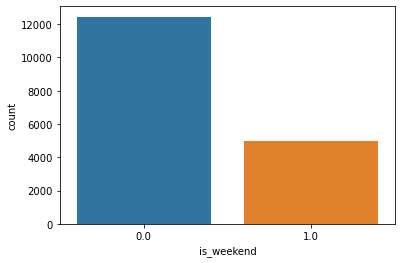

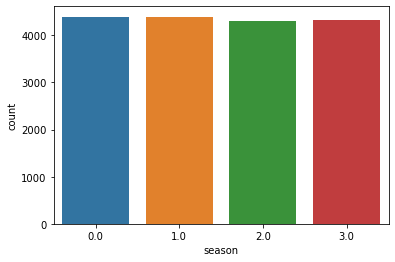

In [378]:
# How many samples make up discrete variable category?
for col in data.loc[:, 'weather_code':'season'].columns:
    var = data.loc[:, 'weather_code':'season'][col]
    sns.countplot(x=var)
    plt.show()
    

In [357]:
# Same output as in plots above
data.loc[:, 'weather_code':'season'].apply(pd.Series.value_counts)

,weather_code,is_holiday,is_weekend,season
0.0,NaN,17030.0,12444.0,4394.0
1.0,6150.0,384.0,4970.0,4387.0
2.0,4034.0,NaN,NaN,4303.0
3.0,3551.0,NaN,NaN,4330.0
4.0,1464.0,NaN,NaN,NaN
7.0,2141.0,NaN,NaN,NaN
10.0,14.0,NaN,NaN,NaN
26.0,60.0,NaN,NaN,NaN


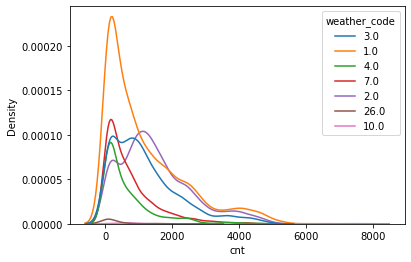

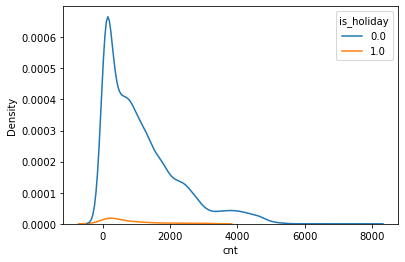

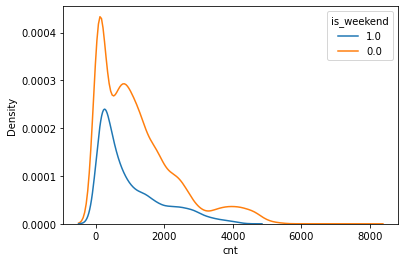

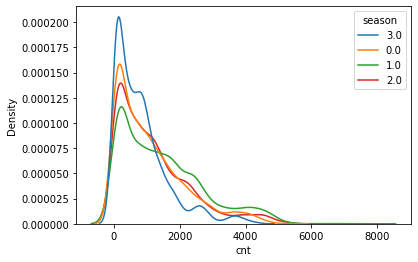

In [358]:
# Bivariate analysis...each discrete variable vs cnt
for col in data.loc[:, 'weather_code':'season'].columns:
    var = data.loc[:, 'weather_code':'season'][col].astype(str)
    sns.kdeplot(x=data.cnt, hue = var)
    plt.show()

Things to explore for new features:  
* break down `weather_code` into two categories (bad and good weather). where is bad == 'rainy' and good otherwise
* categorise `wind_speed`.  [Beaufort scale](https://en.wikipedia.org/wiki/Beaufort_scale).
* Any combination between new weather and wind speed categories?

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

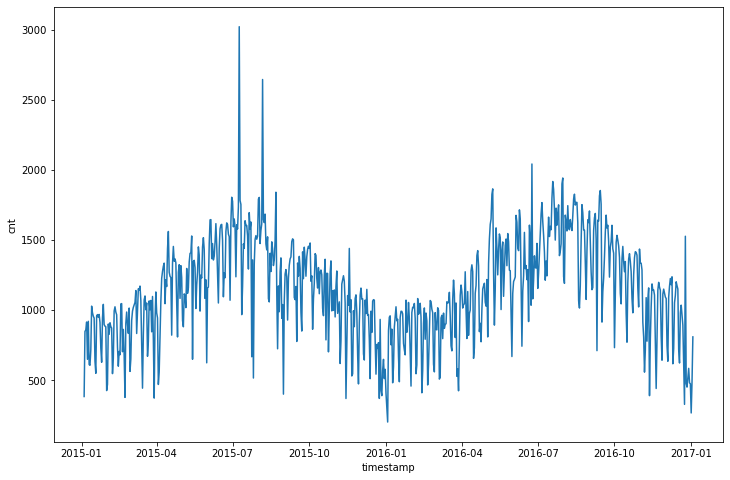

In [376]:
# Temporal evolution of cnt
plt.figure(figsize=(12, 8))

sns.lineplot(x = pd.to_datetime(data['timestamp']).dt.date, y= data['cnt'], err_style=None)

As one would expect, the number of bike shares tends to increase in warm saisons(spring-summer) and decreases in cold saisons(fall-winter).
This saisonality variation of bike shares is then probably better captured in the month. Let's plot and see!

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

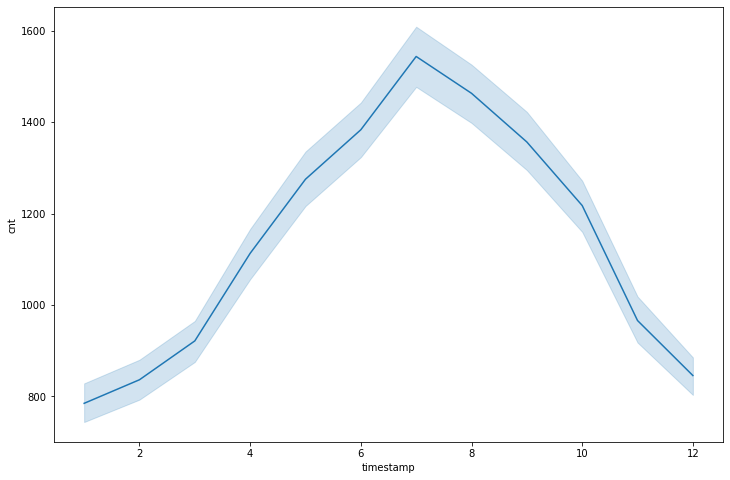

In [360]:
plt.figure(figsize=(12, 8))

sns.lineplot(x = pd.to_datetime(data['timestamp']).dt.month, y= data['cnt'])

This plot first groups `cnt` by month and computes the mean. This smoothes out the hourly and daily variability resulting in a much clearer monthly pattern.

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

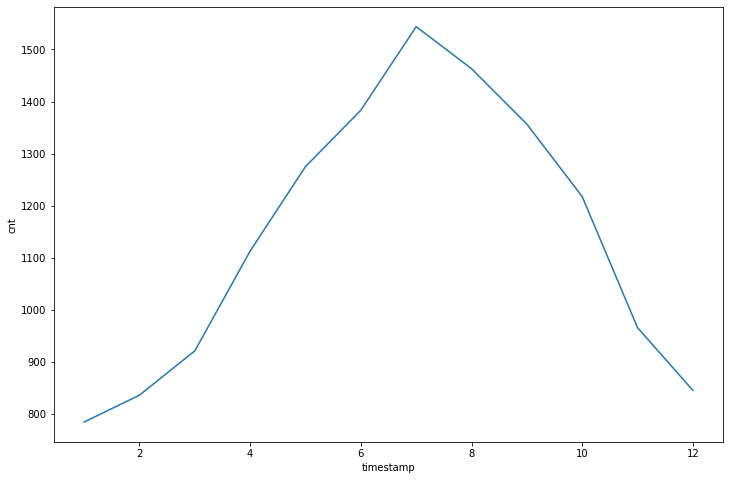

In [361]:
# This is what happens in the background
plt.figure(figsize=(12, 8))
avg_by_month_data = pd.concat([data.timestamp.dt.month, data.cnt], axis=1)
sns.lineplot(data = avg_by_month_data.groupby('timestamp').agg(np.mean).reset_index(), x='timestamp', y = 'cnt')

In [365]:
# from sklearn.preprocessing import FunctionTransformer
# bins = [0, 2, 5, 11, 19, 28, 38, 49, 61, np.inf]
# labels = np.arange(0, 9)
# discretizer = FunctionTransformer(pd.cut, kw_args={'bins': bins, 'labels': labels, 'right':False})

# df_daily['beaufort_scale'] = discretizer.fit_transform(df_daily.wind_speed)

## Daily data

In [72]:
data['date'] = data.timestamp.dt.date


data['is_good_weather'] = data['weather_code'].apply(
    lambda x: 1 if x < 4 else 0)

# Grouping variables by datatype to apply different aggregations
df_num = data[['date', 'cnt', 't1', 't2', 'hum', 'wind_speed']]
df_cat = data[['date', 'is_good_weather', 'weather_code',
               'is_holiday', 'is_weekend', 'season']]

df_num_grp = df_num.groupby('date').agg('mean')
df_cat_grp = df_cat.groupby('date').agg(pd.Series.mode)

# aggregation created an additional class [0, 1] (for bimodal cases)
df_cat_grp['is_good_weather'] = df_cat_grp.is_good_weather.astype(
    str).map({'[0 1]': 0, '1': 1, '0': 0})

# join back together
df_daily = pd.merge(df_num_grp, df_cat_grp, left_index=True,
                    right_index=True).reset_index()

<AxesSubplot:>

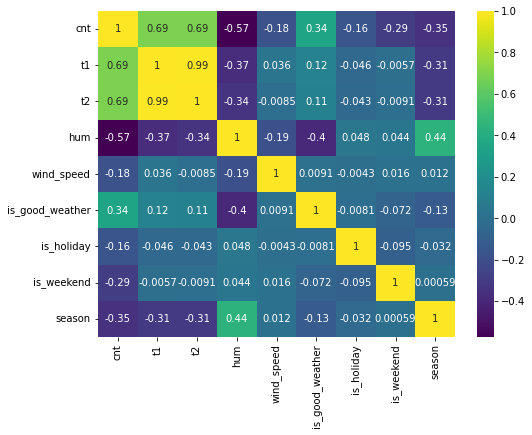

In [73]:
plt.figure(figsize = (8, 6))
sns.heatmap(df_daily.corr(), cmap = 'viridis', annot = True)

<AxesSubplot:xlabel='cnt', ylabel='Count'>

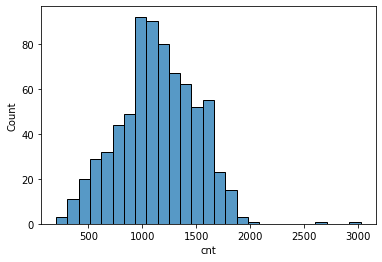

In [306]:
sns.histplot(x = df_daily.cnt)


# STEPS
* Train a model withouth any preprocessing
* New feature from weather_code (good | bad weather)
* Reframe the problem to daily predictions 
* Augment data (which method to use?) 
At each each step, check performance.